# Explore here

In [5]:
#importar y  leer los datos
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#explorar los datos
print(df.shape)
df.drop_duplicates().reset_index(drop=True)
print(df.shape)

(768, 9)
(768, 9)


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#definir variable objetivo
target = df["Outcome"]
num_cols = df.drop(columns=["Outcome"])

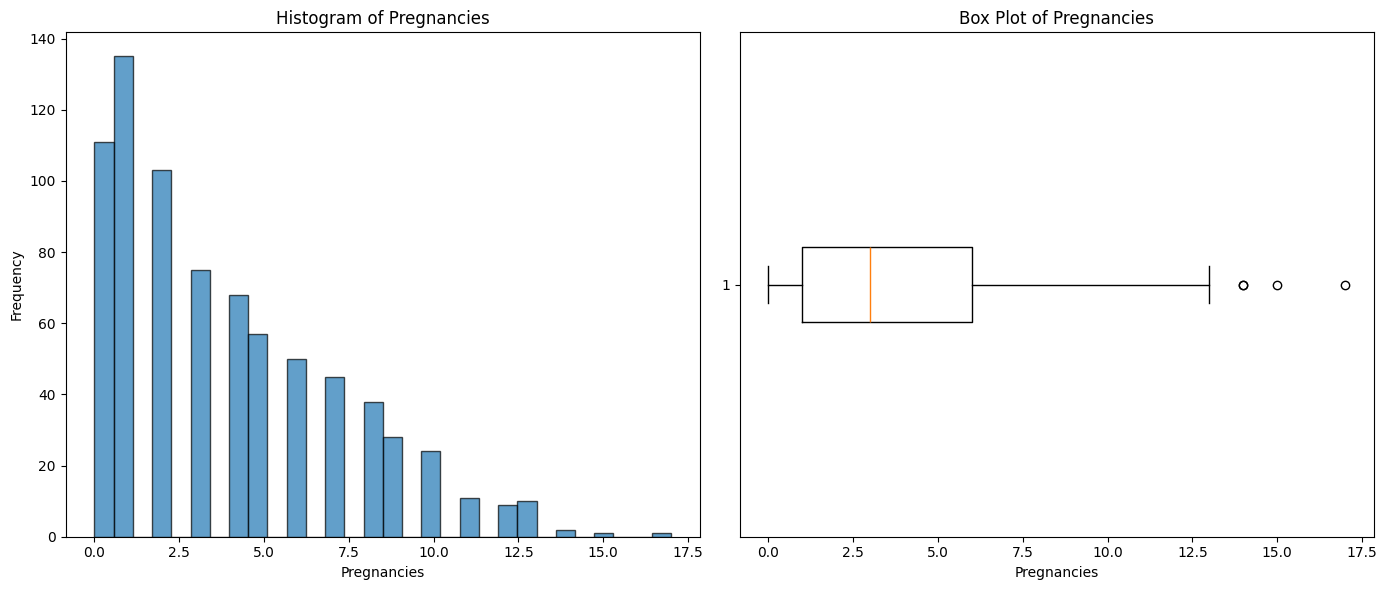

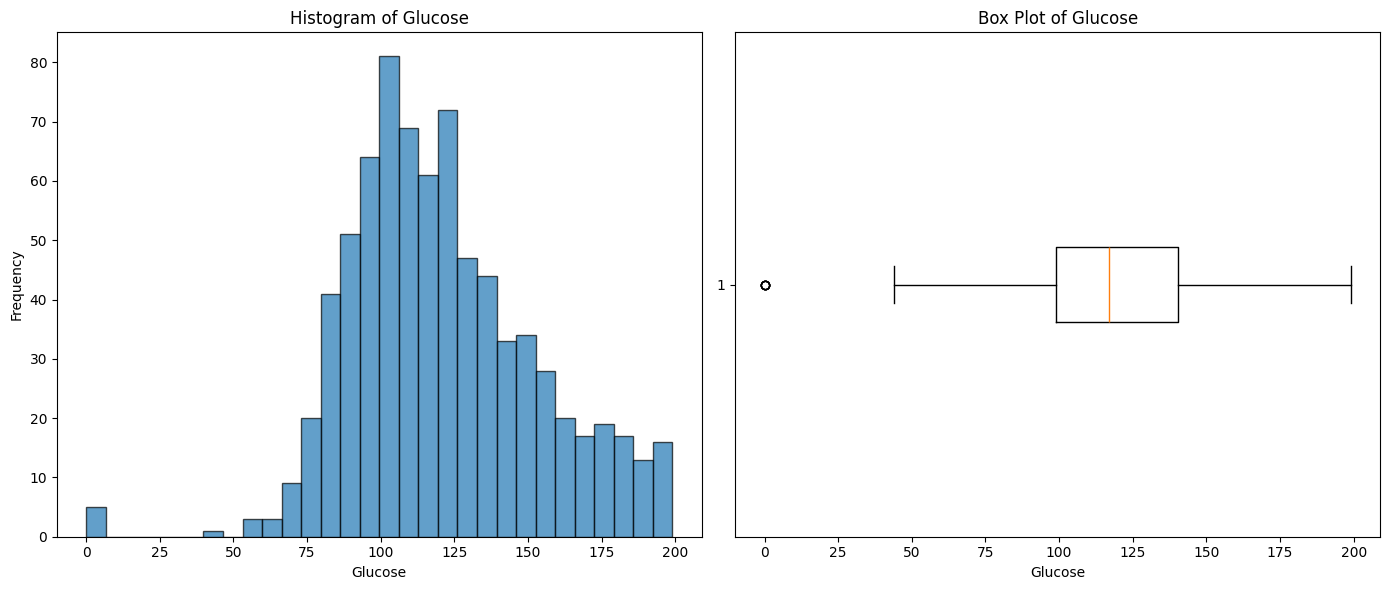

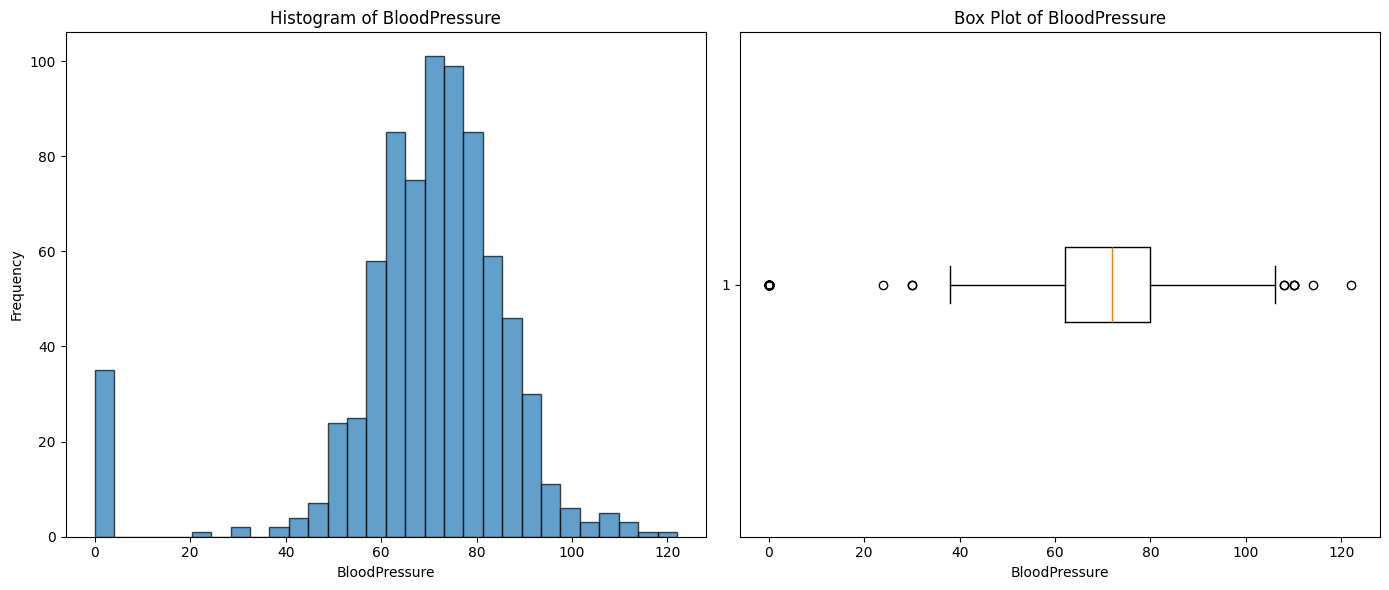

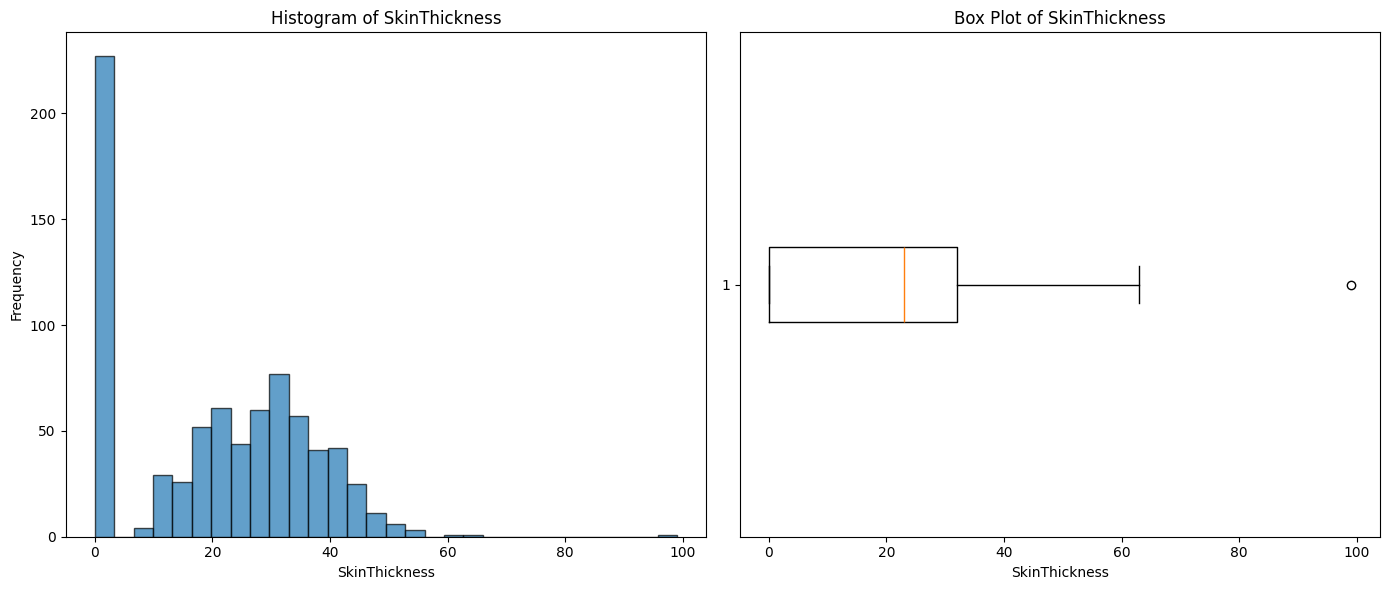

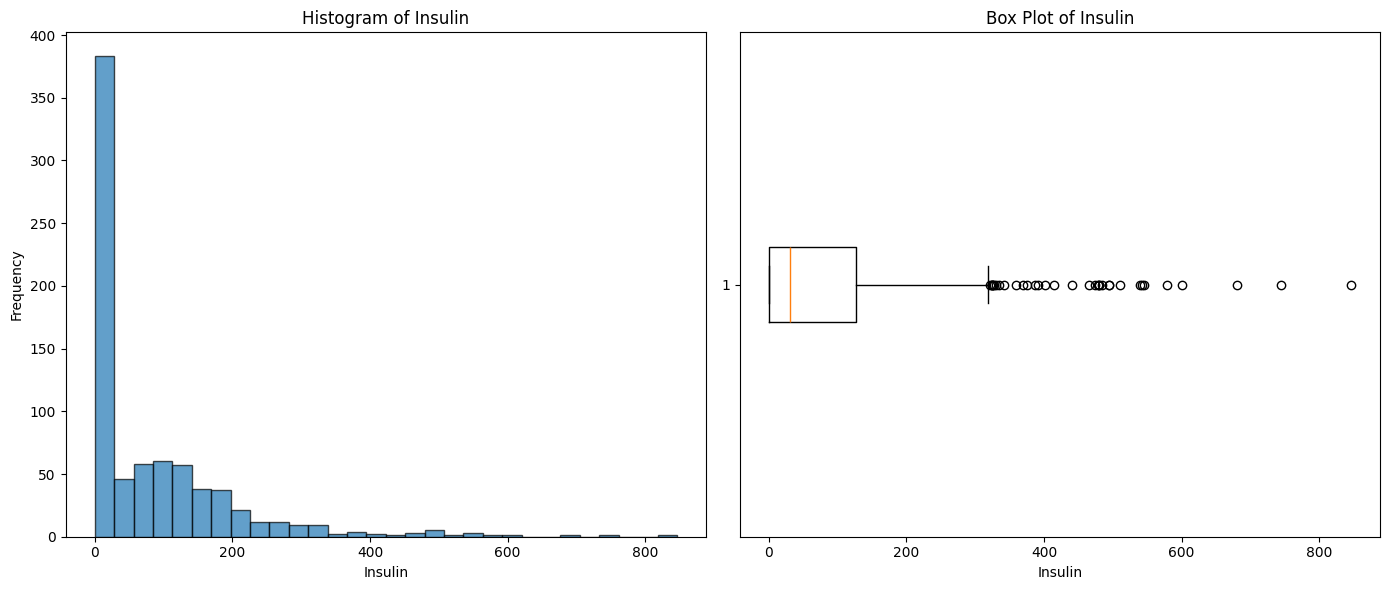

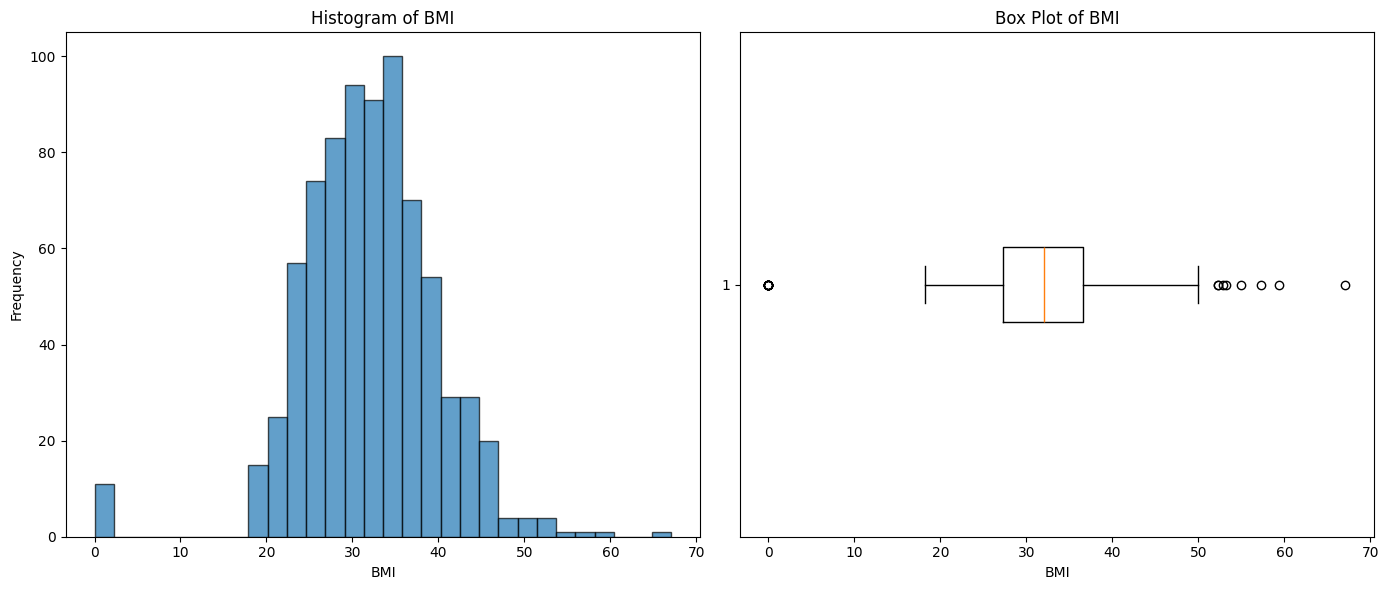

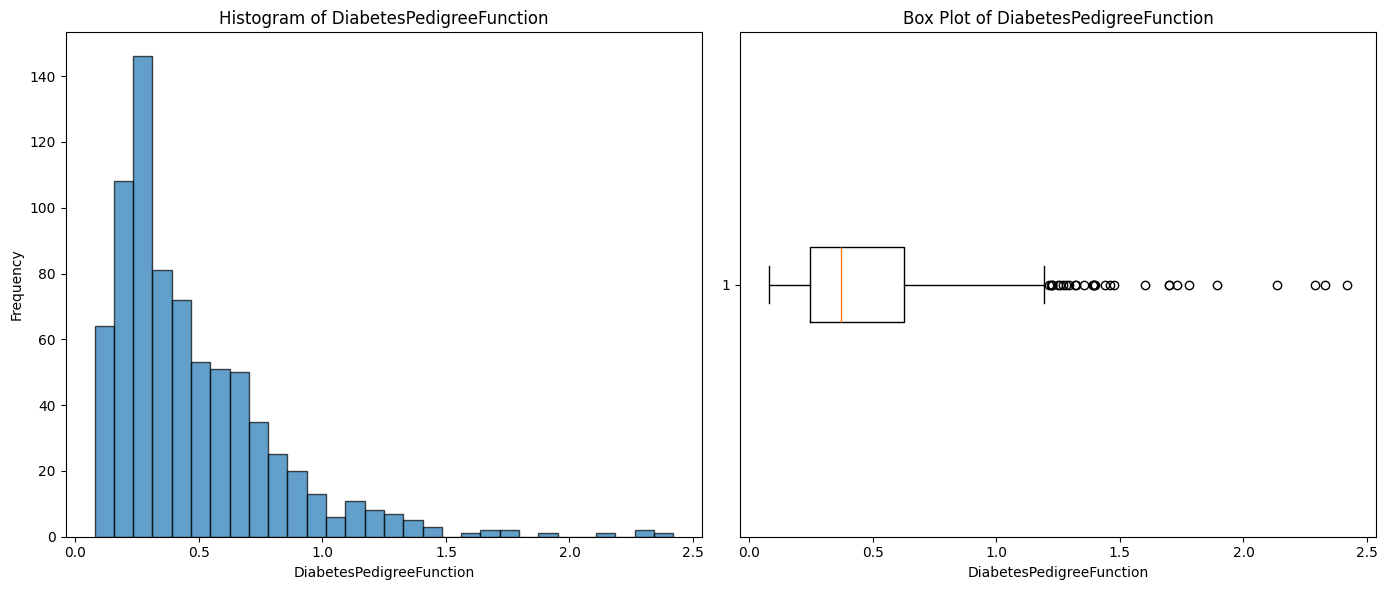

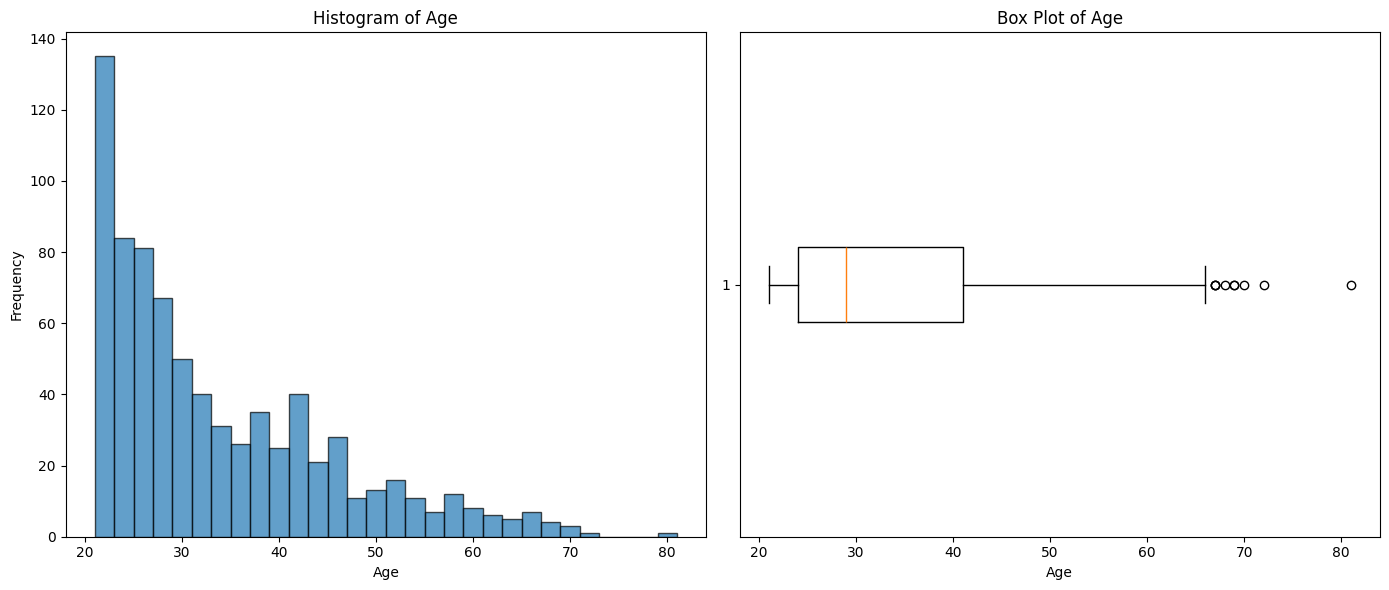

In [11]:
#todas las variables son numericas
#analisis univariante
import matplotlib.pyplot as plt 
import seaborn as sns

for col in num_cols.columns:
    plt.figure(figsize=(14, 6))
    
    # Histograma
    plt.subplot(1, 2, 1)
    plt.hist(num_cols[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Diagrama de Caja y Bigotes
    plt.subplot(1, 2, 2)
    plt.boxplot(num_cols[col], vert=False)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

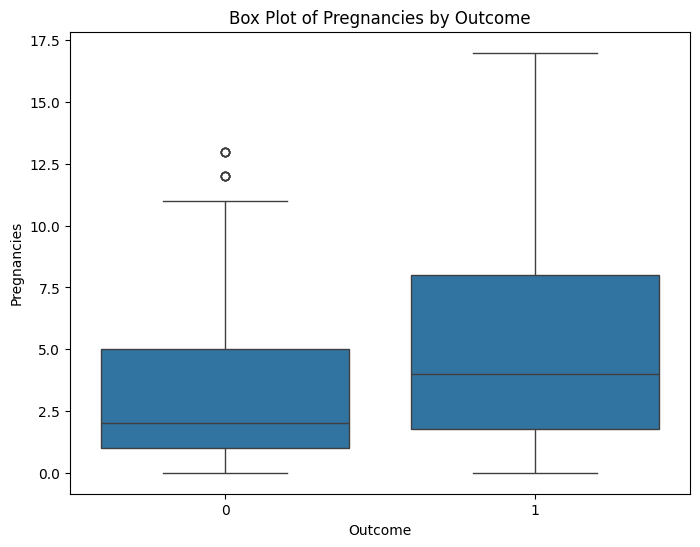

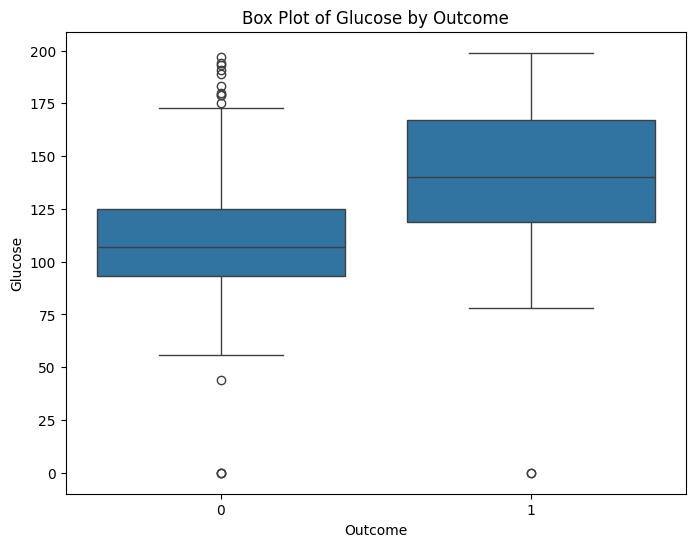

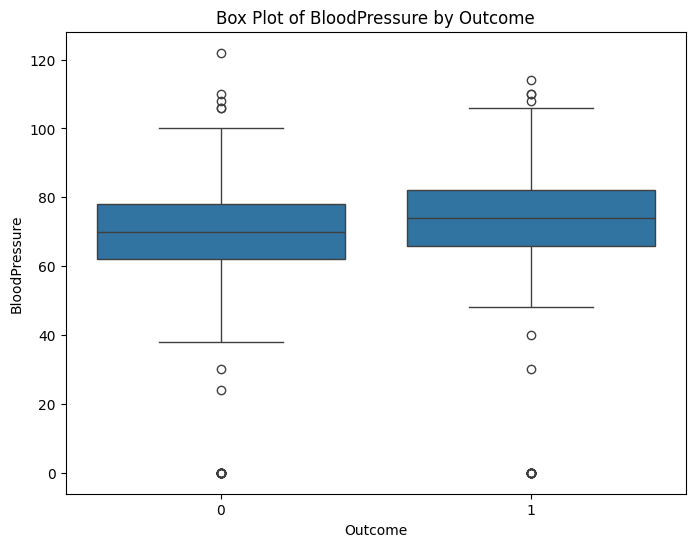

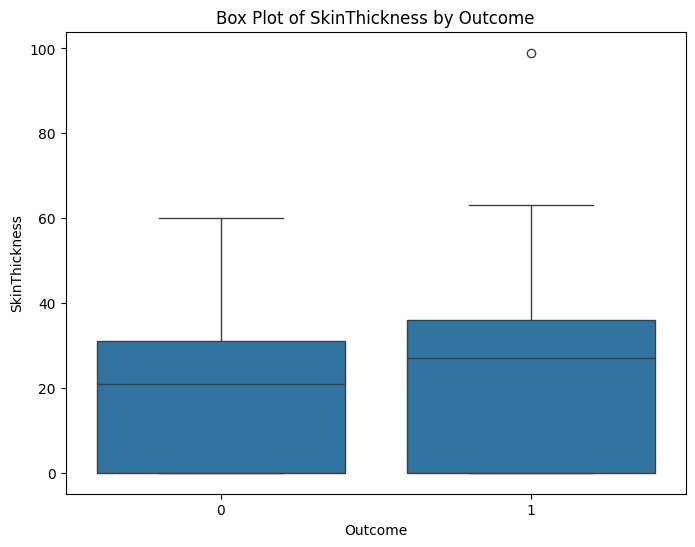

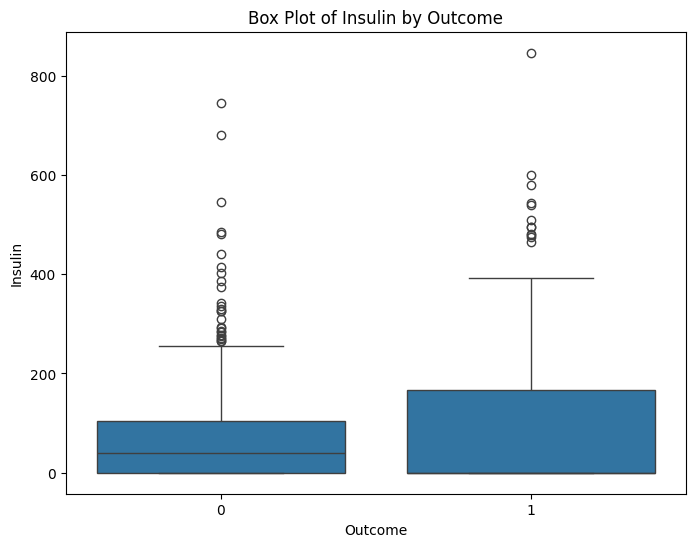

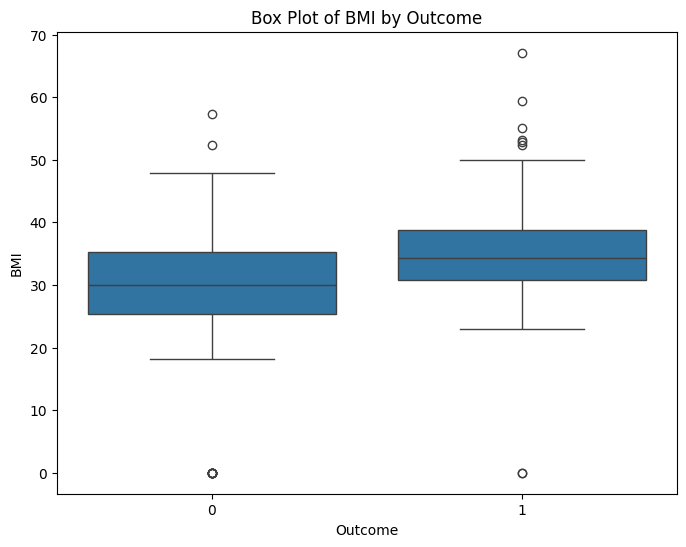

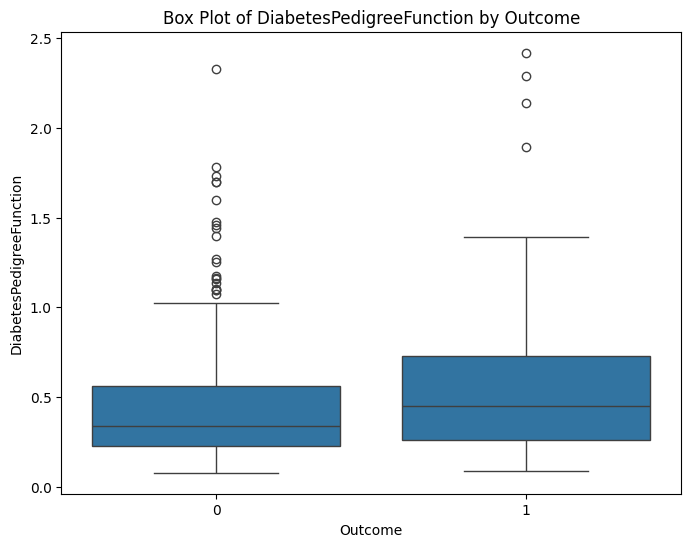

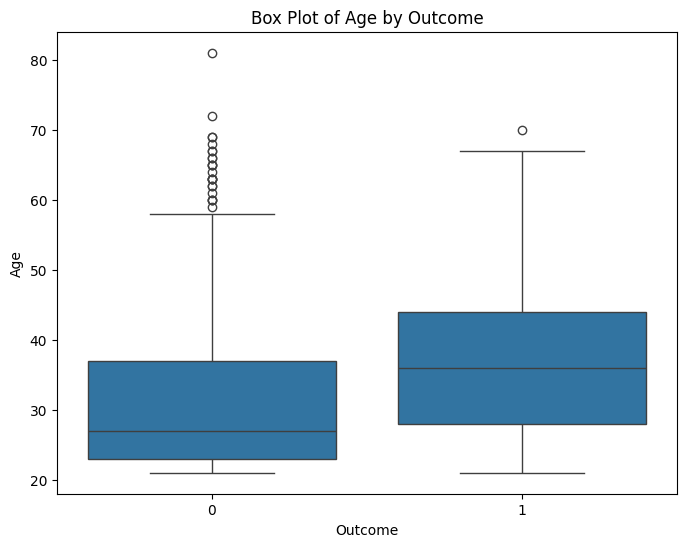

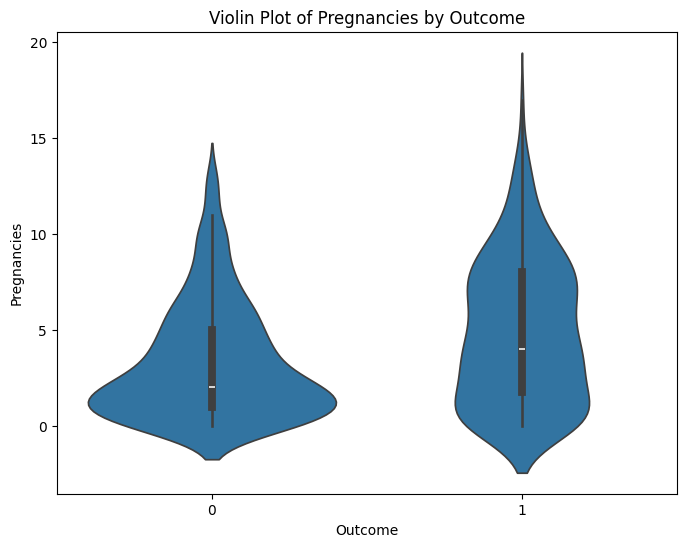

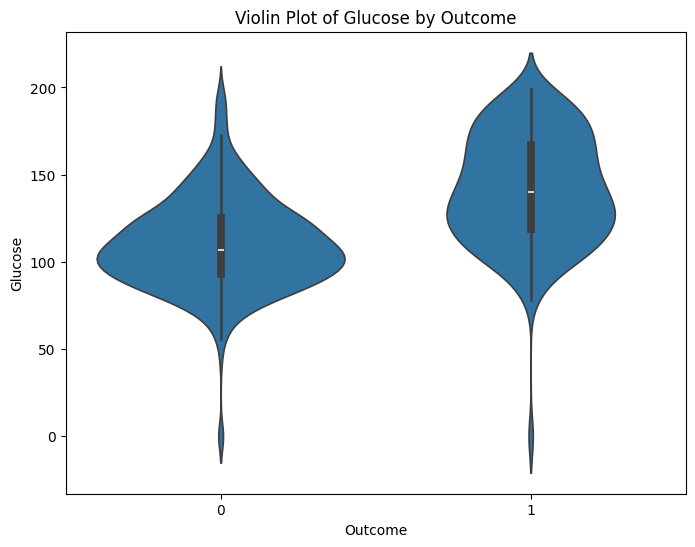

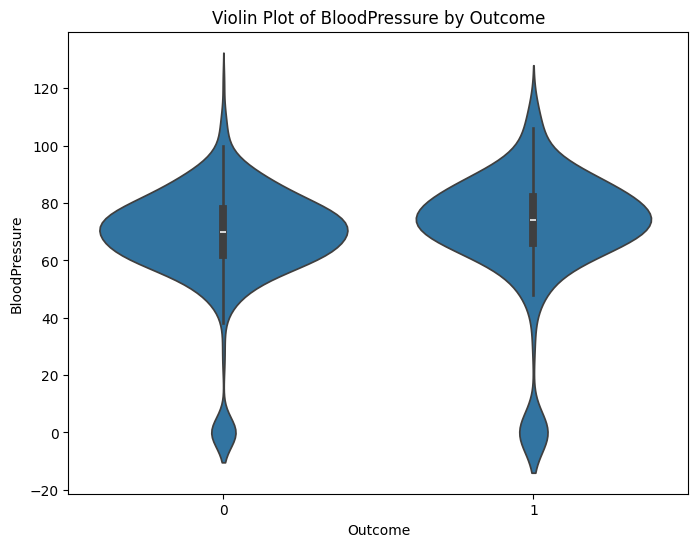

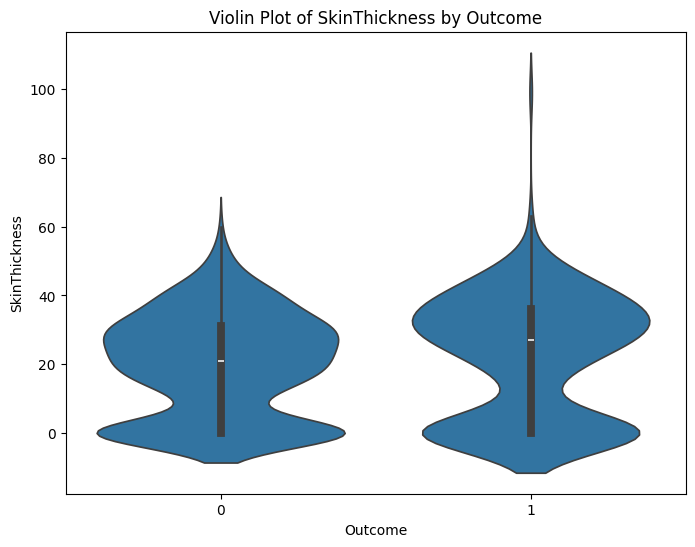

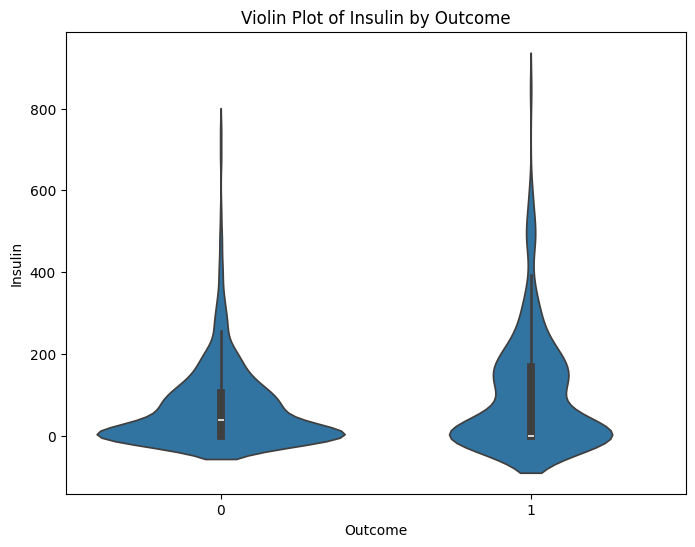

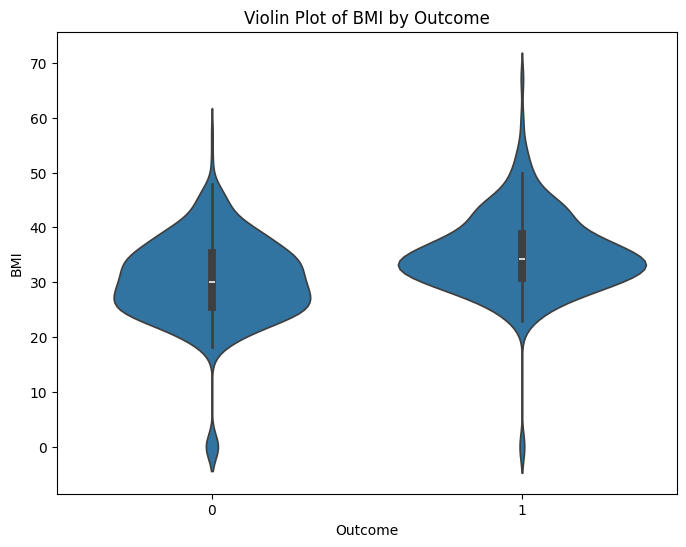

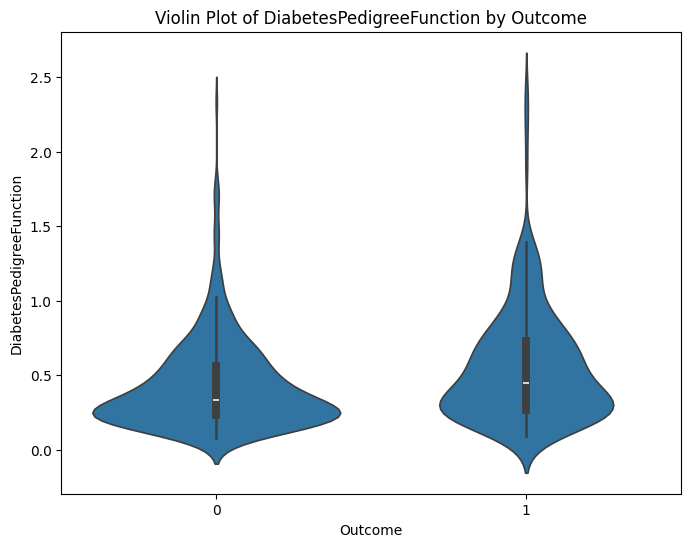

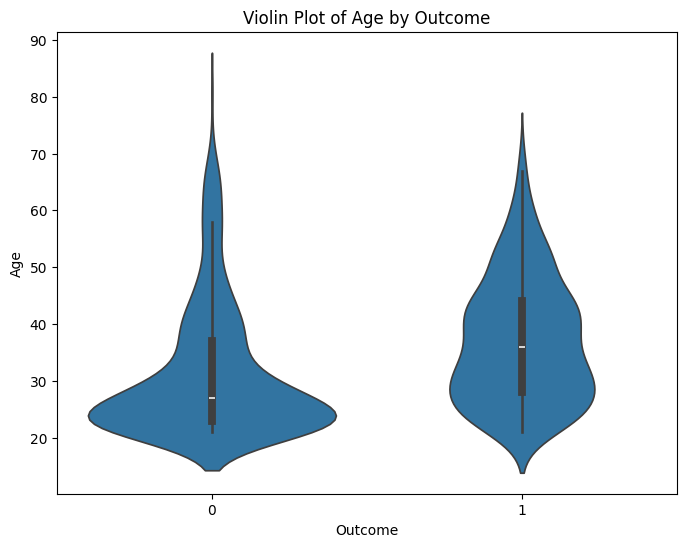

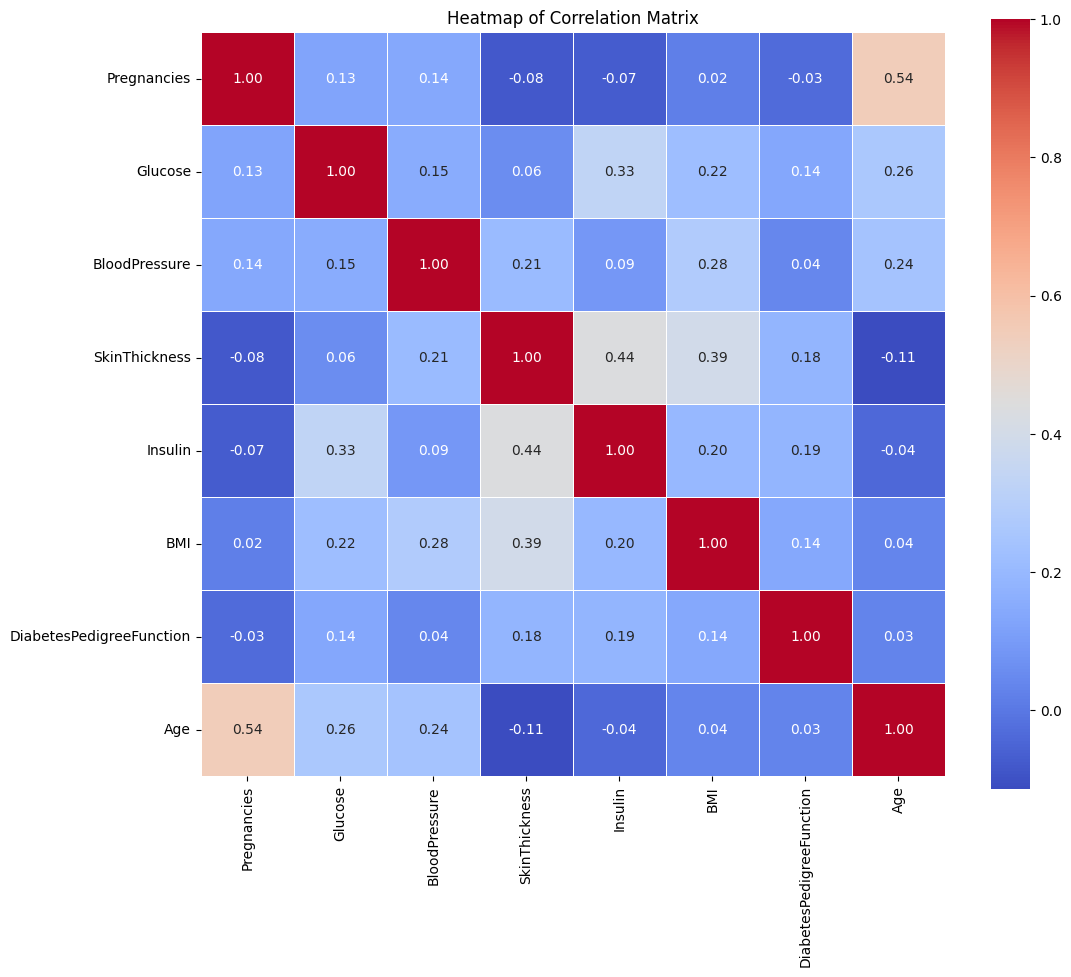

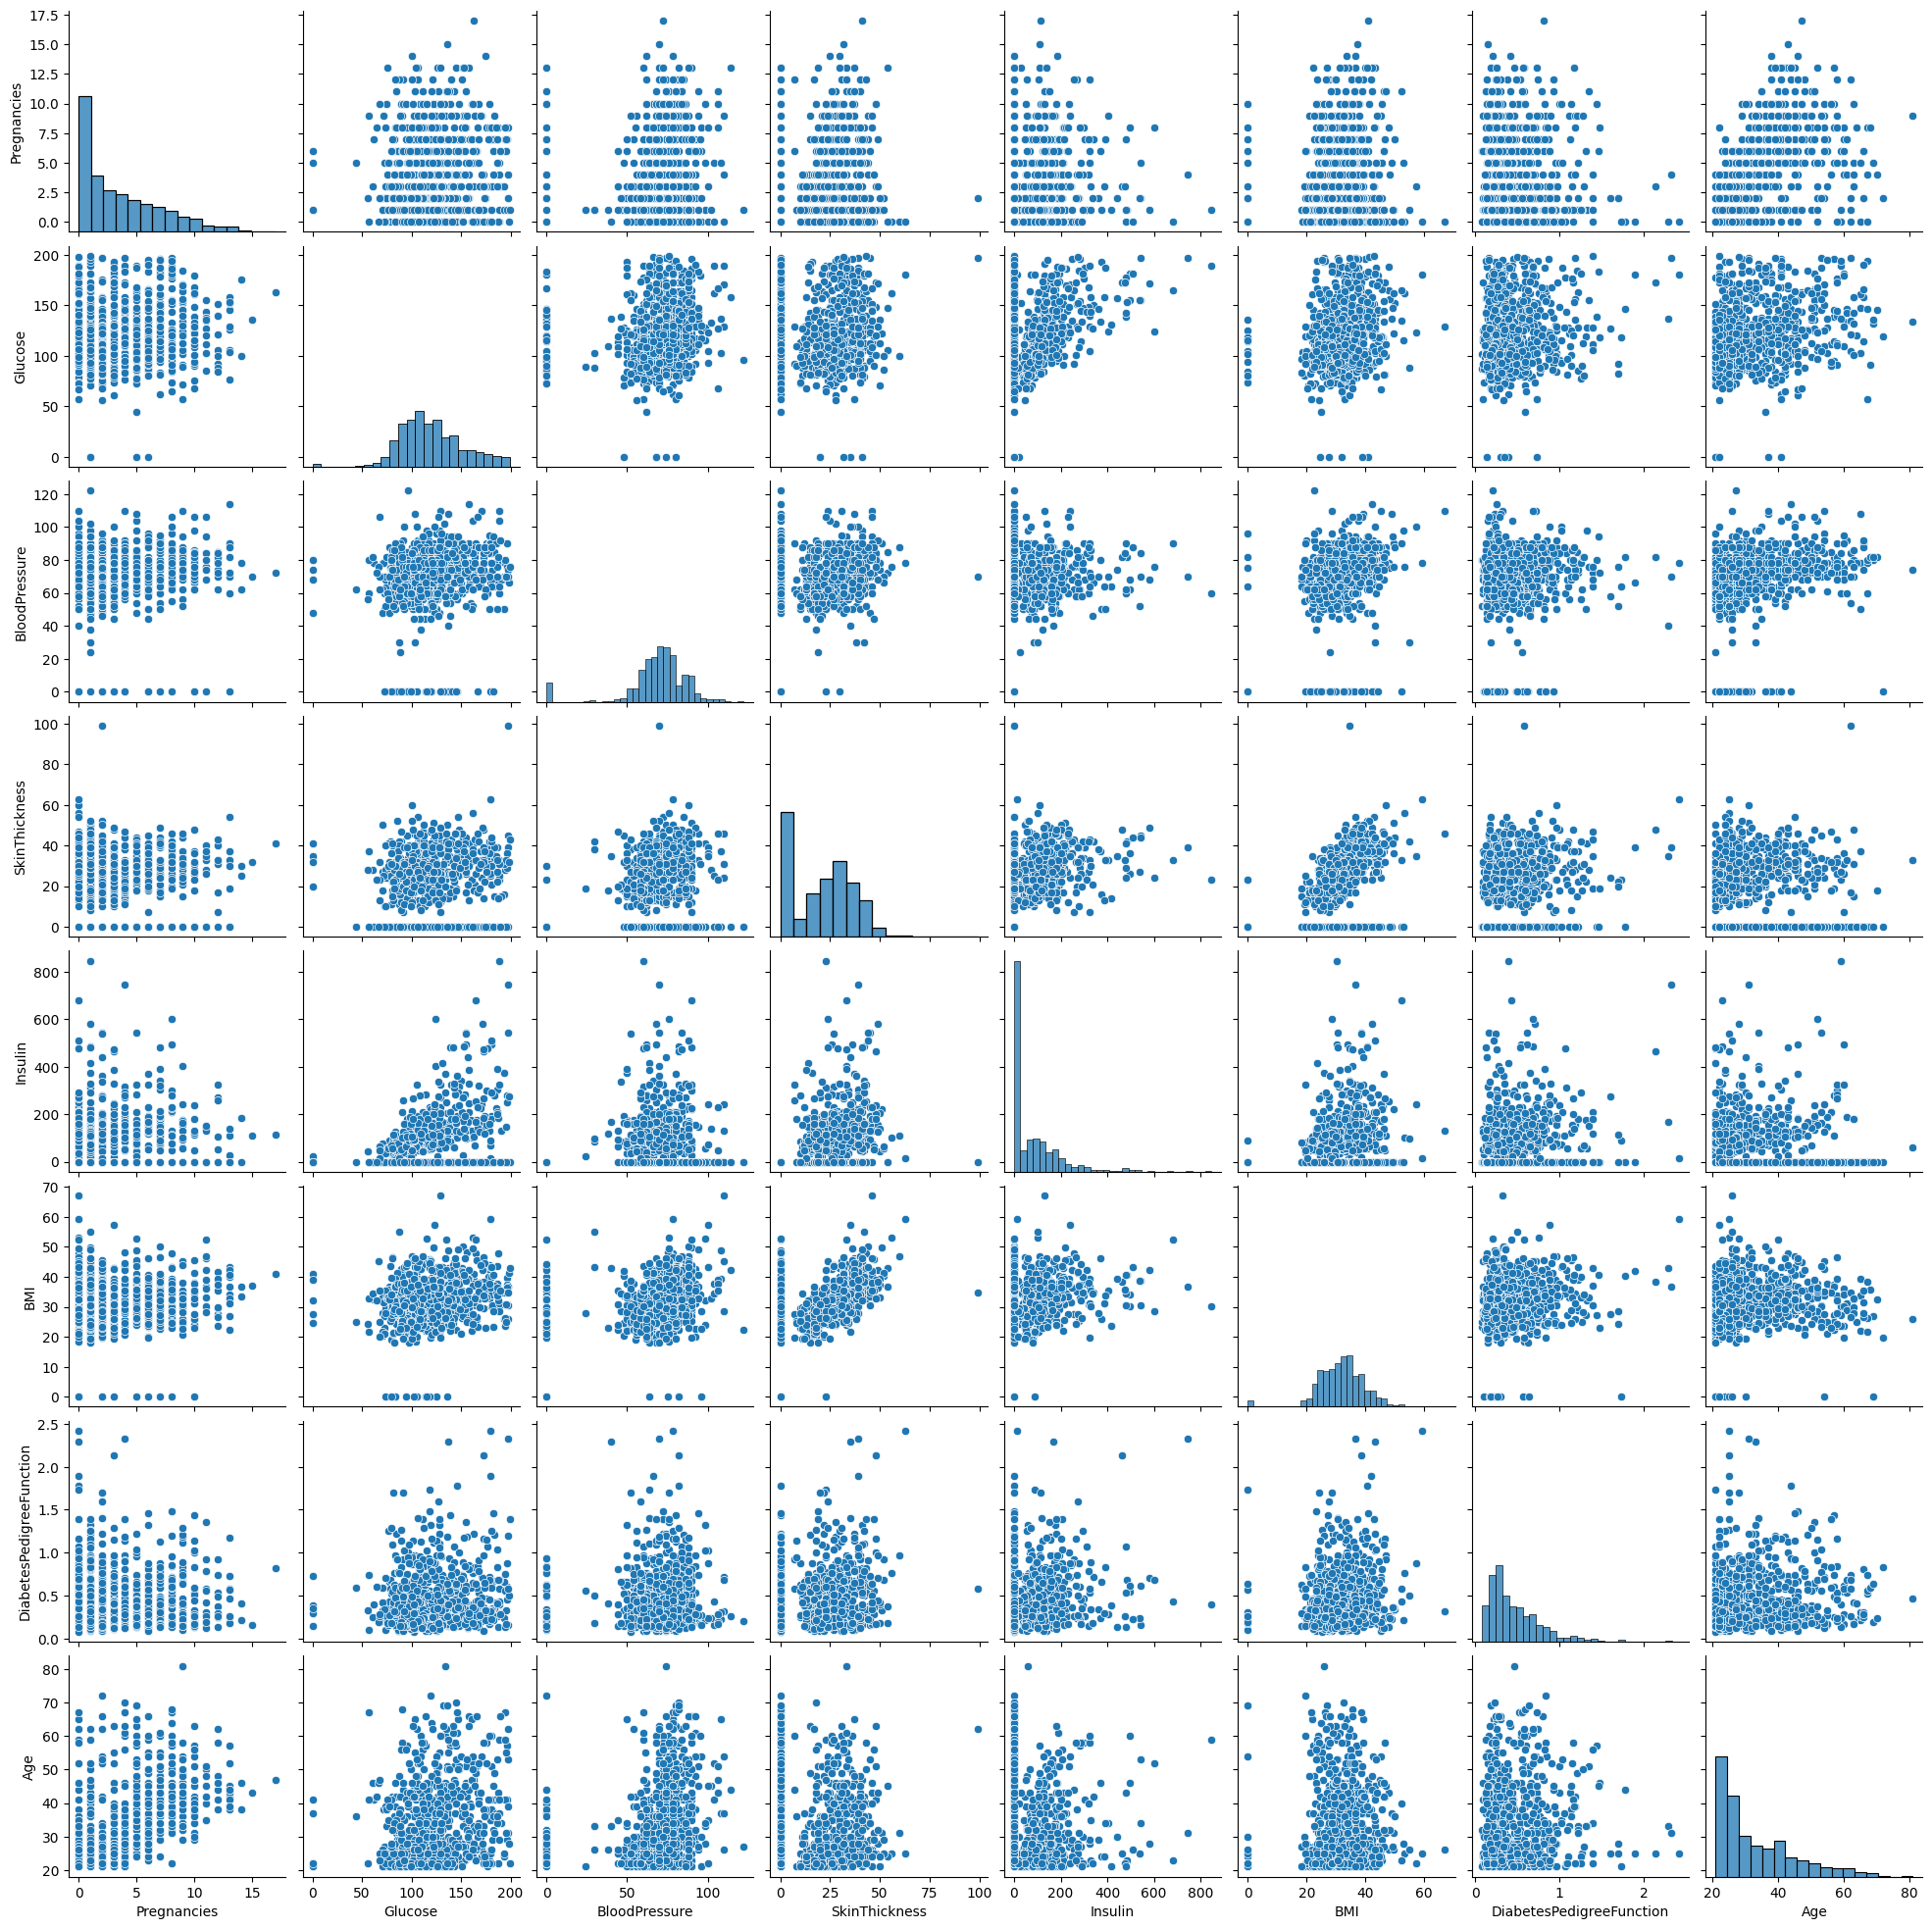

In [12]:
# Relación entre columnas numéricas y la variable objetivo
for col in num_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f'Box Plot of {col} by Outcome')
    plt.show()

# Violin Plot por Categoría
for col in num_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x="Outcome", y=col, data=df)
    plt.title(f'Violin Plot of {col} by Outcome')
    plt.show()

# Mapa de Calor de la Matriz de Correlación
corr_matrix = num_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Pair Plot
sns.pairplot(num_cols)
plt.show()

In [15]:
#separar en train y test
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


<Axes: >

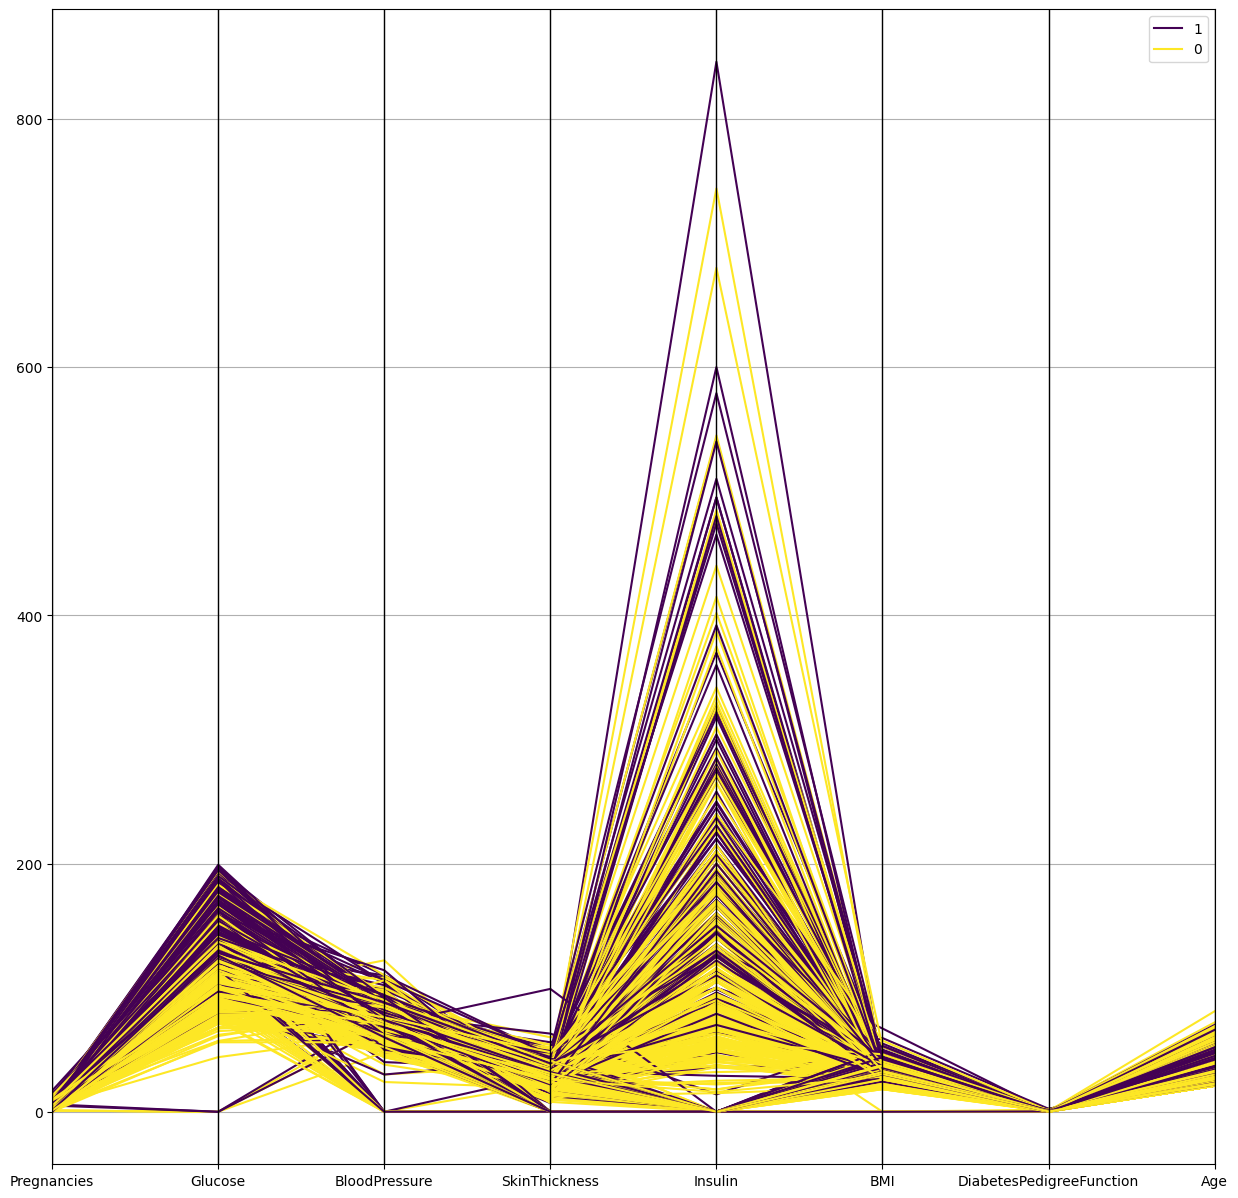

In [17]:
#ver si es aplicable un modelo de arbol
plt.figure(figsize=(15,15))

pd.plotting.parallel_coordinates(df,"Outcome",colormap="viridis")

In [18]:
#entrenar el modelo
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

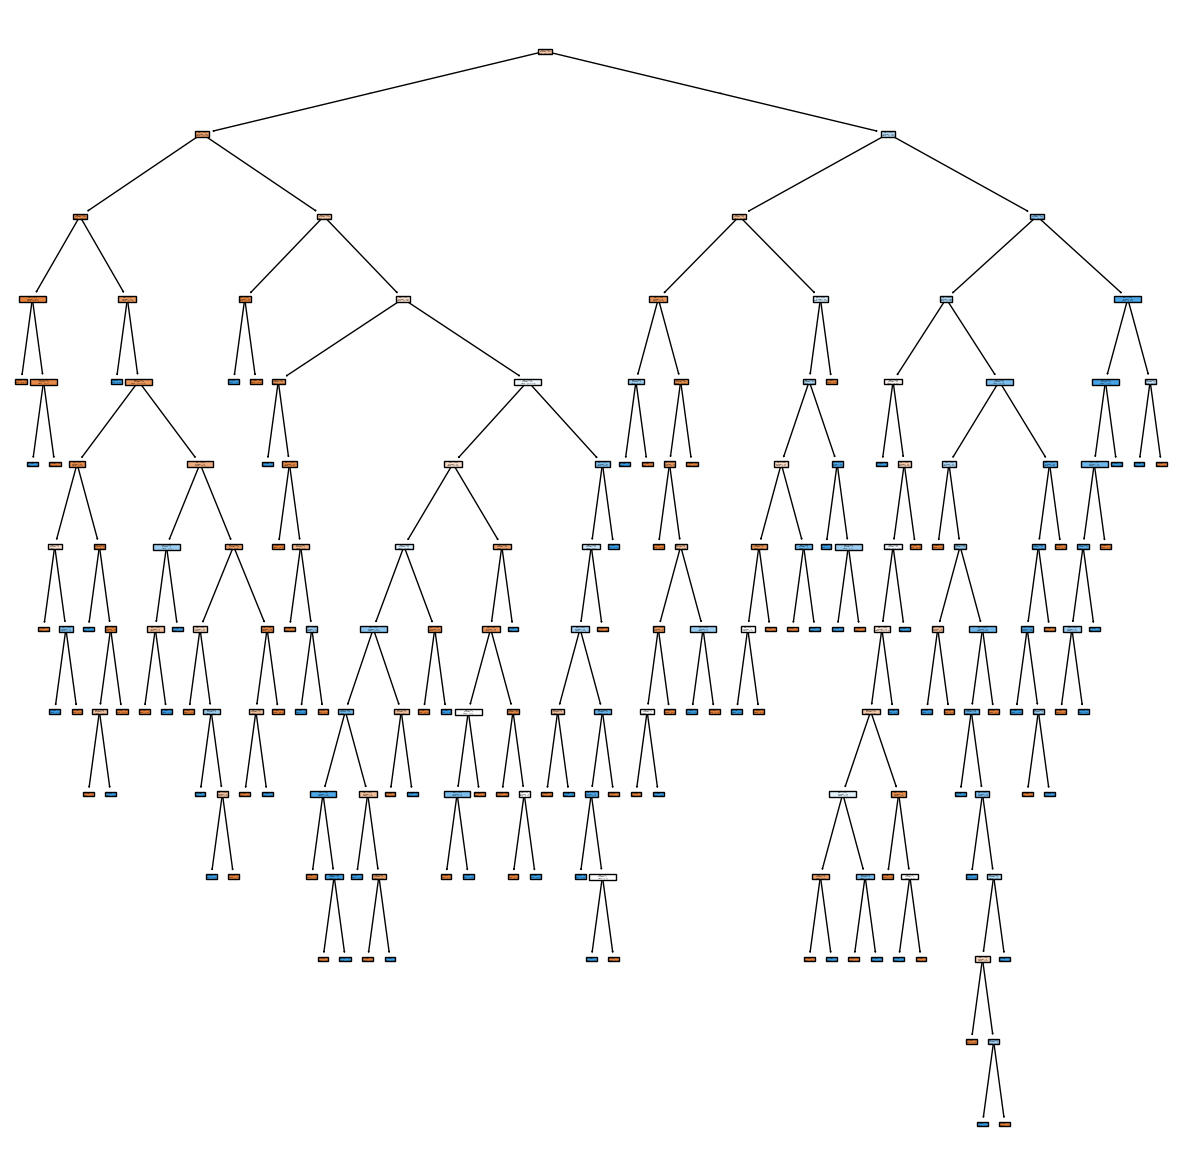

In [19]:
#visualizar el arbol
from sklearn import tree

fig = plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=list(X_train.columns),filled=True)
plt.show()

In [20]:
#predecir y evaluar
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7337662337662337

In [23]:
#mejorar
from sklearn.model_selection import GridSearchCV

hyperparametros = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10,20],
    "min_samples_split": [2,5,10],
    "min_samples_leaf":[1,2,4]
}

grid = GridSearchCV(model,hyperparametros,scoring="accuracy",cv=5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [24]:
#ajustar la grilla
grid.fit(X_train,y_train)

print(f"Mejores parametros: {grid.best_params_}")

Mejores parametros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [26]:
#crear modelo con los mejores parametros
best_model = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_leaf=2,min_samples_split=5,random_state=42)


In [27]:
#entrenar el modelo con los mejores parametros
best_model.fit(X_train,y_train)
#predecir y evaluar con el modelo con los mejores parametros
y_pred= best_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.7857142857142857

In [30]:
#guardar el mejor modelo
from pickle import dump

dump(best_model,open("/workspaces/decision_tree/models/best_model_decision_tree.sav","wb"))

In [31]:
#guardar el modelo en una variable para usarlo
from pickle import load

best_model_2 = load(open("/workspaces/decision_tree/models/best_model_decision_tree.sav","rb"))

In [32]:
#ejemplo usar modelo para predecir
import numpy as np
best_model_2.predict(np.array([6,98,58,33,190,34,0.43,43]).reshape(1,-1))

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])